**Pandas Challenges**


**Topic**: Pandas (Exploring and visualizing our scraped movie data in pandas)

Just getting started? Read this guide: [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)

**Data**: Your own data! But: if you don't have movie data to work on yet, you can use some data on the top grossing 100 movies from 2013, scraped from Box Office Mojo: `2013_movies.csv`


---


**Challenge 1**

Plot domestic total gross over time.


**Challenge 2**

Plot runtime vs. domestic total gross.


**Challenge 3**

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.


**Challenge 4**

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.


**Challenge 5**

What director in your dataset has the highest gross per movie?


**Challenge 6**

Bin your dataset into months and make a bar graph of the mean domestic total gross by month.  Error bars will represent the standard error of the mean.

Title of graph should include:  Mean Domestic Total Gross by Month in 2013

Topic for consideration:  what is the correct formula for the standard error of the mean?  Examine the error bars and see if they are "reasonable."


In [1]:
%pylab 
#imports matplotlib and numpy but not pandas
import pandas as pd
from collections import defaultdict
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
with open('challenges_data/2013_movies.csv', 'r') as reader:
    a = pd.read_csv(reader, index_col=False)

In [3]:
df = pd.DataFrame(a, columns=['Title','Budget','DomesticTotalGross','Director','Rating','Runtime','ReleaseDate'])

In [4]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'], dayfirst=True, infer_datetime_format=True)

In [5]:
df.head(10)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,2013-10-04
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,2013-06-21
7,The Hobbit: The Desolation of Smaug,NaN,258366855,Peter Jackson,PG-13,161,2013-12-13
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,2013-05-24
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,2013-03-08


In [6]:
df.sort_values(by='ReleaseDate', inplace=True)

Question 1:

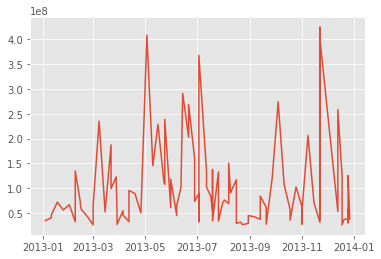

In [7]:
plt.plot(df['ReleaseDate'],df['DomesticTotalGross'])

In [8]:
df.sort_values(by='Runtime', inplace=True)

Question 2: 

<BarContainer object of 100 artists>

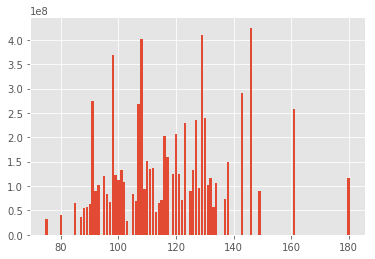

In [9]:
plt.bar(df['Runtime'], df['DomesticTotalGross'])

Question 3:

In [10]:
(df.groupby(by=df['Rating']).Runtime.mean()).reset_index().head(10)

,Rating,Runtime
0,G,107.000000
1,PG,99.933333
2,PG-13,117.510638
3,R,110.729730


In [11]:
df.sort_values(by='ReleaseDate', inplace=True)

In [12]:
(df.groupby(by=df['Rating']).DomesticTotalGross.mean()).reset_index().head(10)

,Rating,DomesticTotalGross
0,G,2.684928e+08
1,PG,1.311357e+08
2,PG-13,1.114498e+08
3,R,6.989243e+07


Question 4:

One Way

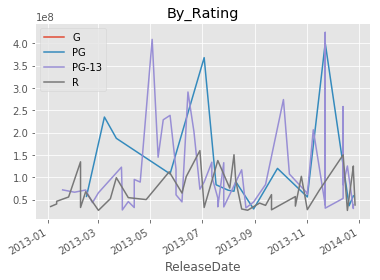

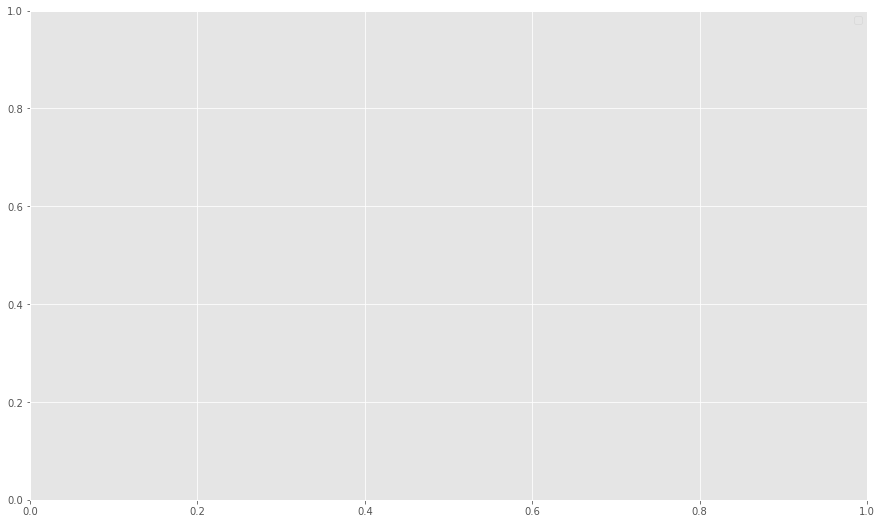

In [14]:
ax = plt.gca()
fig = plt.figure(figsize=(15,9))
labels = []
for group_name, group in df.groupby(by='Rating'):
    group.plot(x = 'ReleaseDate',y = 'DomesticTotalGross',title = 'By_Rating', label = group_name, ax = ax)
    labels.append(group_name)
plt.legend(labels, loc = 'best')

Another Way

In [17]:
group_pg   = df[df['Rating'] == "PG"]
group_g   = df[df['Rating'] == "G"]
group_pg13   = df[df['Rating'] == "PG-13"]
group_R   = df[df['Rating'] == "R"]

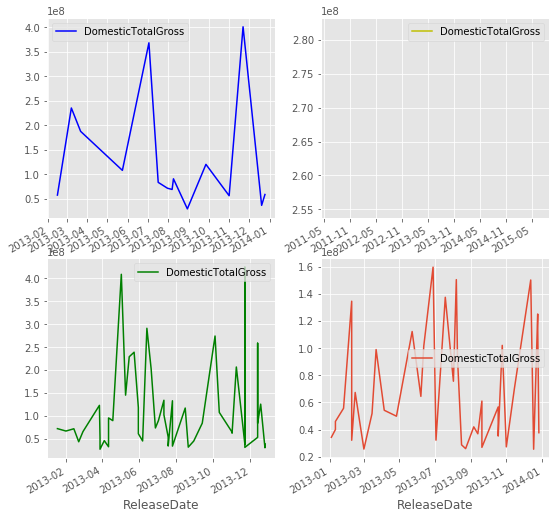

In [39]:
fig = plt.figure(figsize = (9,9))

ax = plt.subplot(2,2,1)

group_pg.plot(x = 'ReleaseDate', y = 'DomesticTotalGross', ax = ax, color = 'b')

ax = plt.subplot(2,2,2)

group_g.plot(x = 'ReleaseDate', y = 'DomesticTotalGross', ax = ax, color = 'y')

ax = plt.subplot(2,2,3)

group_pg13.plot(x = 'ReleaseDate', y = 'DomesticTotalGross', ax = ax, color = 'g')

ax = plt.subplot(2,2,4)

group_R.plot(x = 'ReleaseDate', y = 'DomesticTotalGross', ax = ax)

KeyError: "['2013-01-04T00:00:00.000000000' '2013-01-11T00:00:00.000000000'\n '2013-01-11T00:00:00.000000000' '2013-01-18T00:00:00.000000000'\n '2013-01-25T00:00:00.000000000' '2013-02-01T00:00:00.000000000'\n '2013-02-08T00:00:00.000000000' '2013-02-08T00:00:00.000000000'\n '2013-02-14T00:00:00.000000000' '2013-02-14T00:00:00.000000000'\n '2013-02-15T00:00:00.000000000' '2013-02-22T00:00:00.000000000'\n '2013-03-01T00:00:00.000000000' '2013-03-01T00:00:00.000000000'\n '2013-03-08T00:00:00.000000000' '2013-03-15T00:00:00.000000000'\n '2013-03-22T00:00:00.000000000' '2013-03-22T00:00:00.000000000'\n '2013-03-28T00:00:00.000000000' '2013-03-29T00:00:00.000000000'\n '2013-03-29T00:00:00.000000000' '2013-04-05T00:00:00.000000000'\n '2013-04-05T00:00:00.000000000' '2013-04-12T00:00:00.000000000'\n '2013-04-12T00:00:00.000000000' '2013-04-19T00:00:00.000000000'\n '2013-04-26T00:00:00.000000000' '2013-05-03T00:00:00.000000000'\n '2013-05-10T00:00:00.000000000' '2013-05-16T00:00:00.000000000'\n '2013-05-23T00:00:00.000000000' '2013-05-24T00:00:00.000000000'\n '2013-05-24T00:00:00.000000000' '2013-05-31T00:00:00.000000000'\n '2013-05-31T00:00:00.000000000' '2013-06-07T00:00:00.000000000'\n '2013-06-07T00:00:00.000000000' '2013-06-12T00:00:00.000000000'\n '2013-06-14T00:00:00.000000000' '2013-06-21T00:00:00.000000000'\n '2013-06-21T00:00:00.000000000' '2013-06-28T00:00:00.000000000'\n '2013-06-28T00:00:00.000000000' '2013-07-03T00:00:00.000000000'\n '2013-07-03T00:00:00.000000000' '2013-07-03T00:00:00.000000000'\n '2013-07-12T00:00:00.000000000' '2013-07-12T00:00:00.000000000'\n '2013-07-17T00:00:00.000000000' '2013-07-19T00:00:00.000000000'\n '2013-07-19T00:00:00.000000000' '2013-07-19T00:00:00.000000000'\n '2013-07-26T00:00:00.000000000' '2013-07-26T00:00:00.000000000'\n '2013-07-31T00:00:00.000000000' '2013-08-02T00:00:00.000000000'\n '2013-08-07T00:00:00.000000000' '2013-08-07T00:00:00.000000000'\n '2013-08-09T00:00:00.000000000' '2013-08-09T00:00:00.000000000'\n '2013-08-16T00:00:00.000000000' '2013-08-16T00:00:00.000000000'\n '2013-08-21T00:00:00.000000000' '2013-08-23T00:00:00.000000000'\n '2013-08-30T00:00:00.000000000' '2013-08-30T00:00:00.000000000'\n '2013-09-06T00:00:00.000000000' '2013-09-13T00:00:00.000000000'\n '2013-09-13T00:00:00.000000000' '2013-09-20T00:00:00.000000000'\n '2013-09-20T00:00:00.000000000' '2013-09-27T00:00:00.000000000'\n '2013-10-04T00:00:00.000000000' '2013-10-11T00:00:00.000000000'\n '2013-10-18T00:00:00.000000000' '2013-10-18T00:00:00.000000000'\n '2013-10-25T00:00:00.000000000' '2013-11-01T00:00:00.000000000'\n '2013-11-01T00:00:00.000000000' '2013-11-01T00:00:00.000000000'\n '2013-11-01T00:00:00.000000000' '2013-11-08T00:00:00.000000000'\n '2013-11-15T00:00:00.000000000' '2013-11-22T00:00:00.000000000'\n '2013-11-22T00:00:00.000000000' '2013-11-22T00:00:00.000000000'\n '2013-11-22T00:00:00.000000000' '2013-12-13T00:00:00.000000000'\n '2013-12-13T00:00:00.000000000' '2013-12-13T00:00:00.000000000'\n '2013-12-13T00:00:00.000000000' '2013-12-18T00:00:00.000000000'\n '2013-12-18T00:00:00.000000000' '2013-12-20T00:00:00.000000000'\n '2013-12-25T00:00:00.000000000' '2013-12-25T00:00:00.000000000'\n '2013-12-25T00:00:00.000000000' '2013-12-25T00:00:00.000000000'\n '2013-12-25T00:00:00.000000000' '2013-12-27T00:00:00.000000000'] not in index"

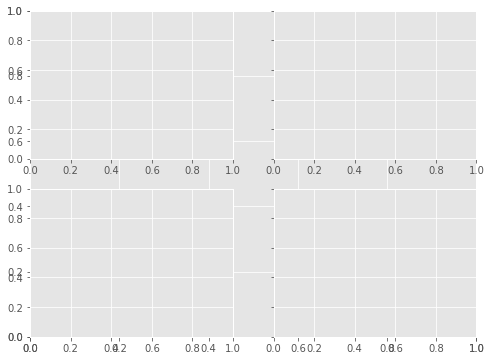

In [40]:
fig,ax = plt.subplots(figsize=(8,6))
fig.subplots(2, 2, sharey='row')
plots = df.plot(x=df['ReleaseDate'], y=df['DomesticTotalGross'], ax=ax, sharex= True)

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
fig.subplots(2, 2, sharey='row')
plots = df.plot(x=df['ReleaseDate'], y=df['DomesticTotalGross'], ax=ax, sharex= True)

Question 5:

In [41]:
a = pd.DataFrame(df.groupby('Director')['DomesticTotalGross'].mean().reindex())

In [42]:
a.sort_values('DomesticTotalGross', ascending=False)

,DomesticTotalGross
Director,
Francis Lawrence,424668047
Shane Black,409013994
Chris BuckJennifer Lee,400738009
Pierre CoffinChris Renaud,368061265
Zack Snyder,291045518
Alfonso Cuaron,274092705
Dan Scanlon,268492764
Peter Jackson,258366855
Justin Lin,238679850


Question 6:

In [43]:
df.sort_values('ReleaseDate', ascending=False).head(10)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
78,August: Osage County,NaN,37738810,John Wells,R,130,2013-12-27
27,The Wolf of Wall Street,100000000.0,116900694,Martin Scorsese,R,180,2013-12-25
23,Lone Survivor,40000000.0,125095601,Peter Berg,R,121,2013-12-25
77,47 Ronin,175000000.0,38362475,Carl Rinsch,PG-13,127,2013-12-25
91,Grudge Match,40000000.0,29807260,Peter Segal,PG-13,113,2013-12-25
59,The Secret Life of Walter Mitty,90000000.0,58236838,Ben Stiller,PG,114,2013-12-25
81,Walking with Dinosaurs,80000000.0,36076121,Barry CookNeil Nightingale,PG,87,2013-12-20
99,Her,23000000.0,25568251,Spike Jonze,R,120,2013-12-18
22,Anchorman 2: The Legend Continues,50000000.0,125168368,Adam McKay,PG-13,119,2013-12-18
7,The Hobbit: The Desolation of Smaug,NaN,258366855,Peter Jackson,PG-13,161,2013-12-13


In [44]:
df_monthly = df.set_index('ReleaseDate')

In [45]:
df_mean = df_monthly['DomesticTotalGross'].resample('M').mean()
df_error = df_monthly['DomesticTotalGross'].resample('M').std()

In [46]:
df_mean = pd.DataFrame(df_mean)

In [47]:
df_mean['STDGross'] = df_error

In [48]:
df_mean.head(3)

,DomesticTotalGross,STDGross
ReleaseDate,,
2013-01-31,4.954324e+07,1.465947e+07
2013-02-28,6.738601e+07,3.283185e+07
2013-03-31,9.609710e+07,7.323942e+07


In [49]:
df_mean['ReleaseDate'] = pd.to_datetime(df_mean.index)

In [50]:
type(pd.to_datetime(df_mean['ReleaseDate'], yearfirst=True))

pandas.core.series.Series

In [51]:
x = stat_month.Month
y = stat_month.DomesticTotalGross['mean']
e = stat_month.DomesticTotalGross['std']

plt.figure(figsize=(10,5))
plt.errorbar(x, y, e, linestyle='None', marker='^')
plt.xticks(list(range(1,13)))http://localhost:8888/notebooks/ds/metis/metisgh/nyc18_ds17/challenges/Panda's%20Challenge%20Week%203.ipynb#
plt.xlabel('Month')
plt.ylabel('Average domestic total gross')
plt.title('Average domestic total gross by month')
plt.show()

SyntaxError: invalid syntax (<ipython-input-51-cdf5755d2035>, line 7)

Text(0.5,1,'Mean Domestic Total Gross by Month in 2013')

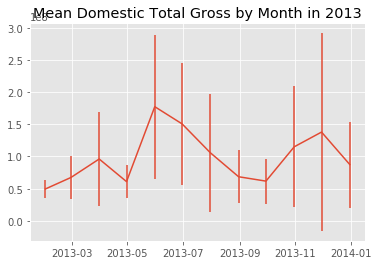

In [52]:
plt.errorbar(df_mean.index, df_mean['DomesticTotalGross'], yerr= df_mean['STDGross'])
plt.title('Mean Domestic Total Gross by Month in 2013')

There is heteroskedasticity